# Trabalho 1 - Tipo de Imagem: SÍSMICA
Descrição do trabalho:

http://webserver2.tecgraf.puc-rio.br/~mgattass/visao/trb/T1.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Mudando o diretório para o meu Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd "drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1/"

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1


In [3]:
!pwd

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1


In [4]:
!curl -o ./imagens/sismica/f3_seismic_with_null_traces.sgy http://webserver2.tecgraf.puc-rio.br/~mgattass/dat/segy/f3_seismic_with_null_traces.sgy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1235M  100 1235M    0     0  20.8M      0  0:00:59  0:00:59 --:--:-- 21.3M


In [5]:
path = './imagens/sismica/'

### Imports

In [6]:
!pip install segyio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import segyio
import matplotlib.pyplot as plt

In [8]:
def load_segy( fname ):

    with segyio.open( fname, ignore_geometry=True ) as file:

        # Get basic attributes
        n_traces = file.tracecount
        sample_rate = segyio.tools.dt( file ) / 1000
        n_samples = file.samples.size
        time = file.samples
        amplitude = file.trace.raw[:]

        return n_traces, n_samples, sample_rate, time, amplitude

In [9]:
fname = path + 'f3_seismic_with_null_traces.sgy'

In [10]:
%%time

n_traces, n_samples, dt_samples, time_axis, data = load_segy( fname )

print( f'Número de traços do volume: {n_traces}' )
print( f'Número de amostras por traço: {n_samples}' )
print( f'Delta t de amostragem (dta): {dt_samples} ms' )
print()

Número de traços do volume: 619101
Número de amostras por traço: 463
Delta t de amostragem (dta): 4.0 ms

CPU times: user 1.53 s, sys: 1.15 s, total: 2.68 s
Wall time: 3.81 s


In [11]:
# informação tirada da internet 915 traços por seção inline
n_inlines = 651
n_crosslines = 951

print( f'n_inlines: {n_inlines}' )
print( f'n_crosslines: {n_crosslines}' )
print( f'n_traces: {n_traces}' )
print( f'n_inlines * n_crosslines: {n_inlines * n_crosslines}' )

n_inlines: 651
n_crosslines: 951
n_traces: 619101
n_inlines * n_crosslines: 619101


In [12]:
data.shape

(619101, 463)

In [13]:
vol = data.reshape( ( n_inlines, n_crosslines, n_samples ) )
print( vol.shape )

(651, 951, 463)


In [14]:
inline = n_inlines//2
crossline = n_crosslines//2
timeline = n_samples//2

print( f'inline: {inline}' )
print( f'crossline: {crossline}' )
print( f'timeline: {timeline}' )

inline: 325
crossline: 475
timeline: 231


In [15]:
inline_section = vol[ inline, :, : ]
crossline_section = vol[ :, crossline, : ]
timeline_section = vol[ :, :, timeline ]

print( f'inline_section: {inline_section}' )
print( f'crossline_section: {crossline_section}' )
print( f'timeline_section: {timeline_section}' )

inline_section: [[    0.     0.     0. ...   608. -1693. -3152.]
 [    0.     0.     0. ...  -537. -2508. -3410.]
 [    0.     0.     0. ... -1961. -2303. -1463.]
 ...
 [    0.     0.     0. ... -5486. -4913. -5984.]
 [    0.     0.     0. ... -5706. -4790. -5846.]
 [    0.     0.     0. ... -6444. -6135. -5796.]]
crossline_section: [[    0.     0.     0. ... -1537.  1085.  1190.]
 [    0.     0.     0. ... -2583.  -473.  1384.]
 [    0.     0.     0. ... -1504.   431.  1013.]
 ...
 [    0.     0.    15. ... -2282.  1050.  3284.]
 [    0.     0.  -307. ... -1951.   263.  1501.]
 [    0.     0.  -441. ... -1360.  2708.  3596.]]
timeline_section: [[ 2635.  3799.  2111. ... -1354. -2727. -1763.]
 [ 3512.  2564.  2567. ... -1647. -2335. -2780.]
 [ 3237.  2890.  2564. ... -1647. -2276. -2058.]
 ...
 [    0.     0.     0. ...  2377.  3618.  4333.]
 [    0.     0.     0. ...  2192.  3753.  4801.]
 [    0.     0.     0. ...  2540.  3344.  4011.]]


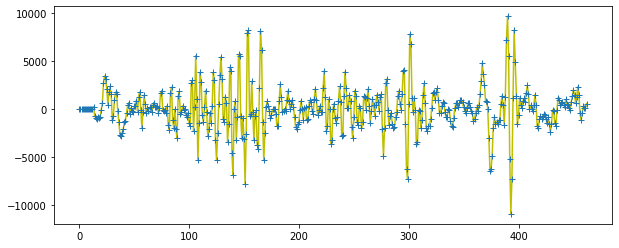

In [16]:
x = np.linspace( 
    0, 
    n_samples - 1, 
    n_samples )
trace1 = inline_section[ crossline, : ]
trace2 = crossline_section[ inline, : ]

plt.figure( figsize=(10, 4) )
plt.plot( x, trace1, 'y' )
plt.plot( x, trace2, '+' )
plt.show()

In [17]:
def show_img(img, map, clim = None):

    plt.figure( figsize=( 10, 6 ) )
    plt.imshow( img, cmap=map, aspect='auto' )
    if clim:
        plt.clim(clim)
    plt.colorbar()
    plt.show()

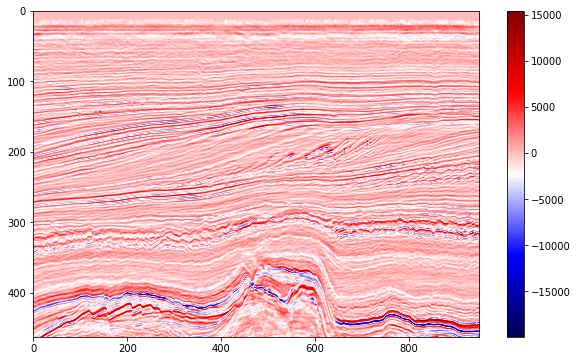

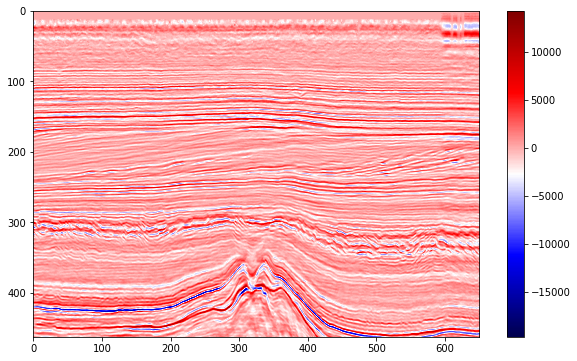

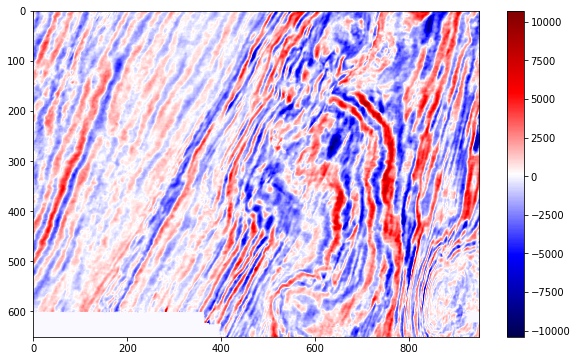

In [18]:
show_img( inline_section.T, 'seismic' )
show_img( crossline_section.T, 'seismic' )
show_img( timeline_section, 'seismic' )

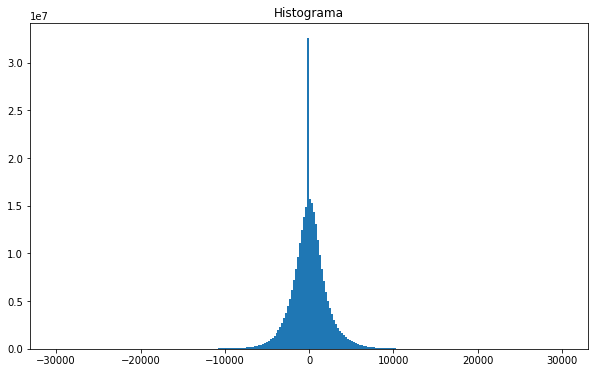

CPU times: user 9.21 s, sys: 1 s, total: 10.2 s
Wall time: 17.9 s


In [19]:
%%time

def show_hist( data ):

    plt.figure( figsize=(10, 6) )
    plt.title( 'Histograma' )
    plt.hist( data.ravel(), 256 )
    plt.show()

show_hist( vol )

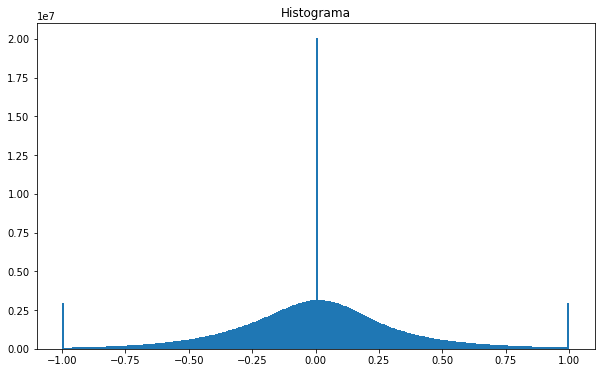

CPU times: user 13.5 s, sys: 676 ms, total: 14.1 s
Wall time: 17.9 s


In [20]:
%%time

p1, p99, = np.percentile( vol.ravel(), (1, 99) )
factor = np.amax( np.abs( [p1, p99] ) )
volp = vol/factor
volp[ volp > 1 ] = 1
volp[ volp < -1 ] = -1
show_hist( volp )

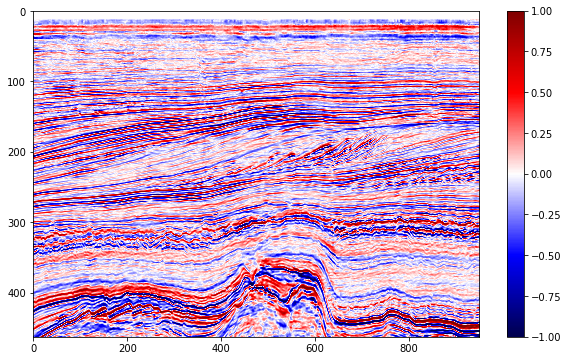

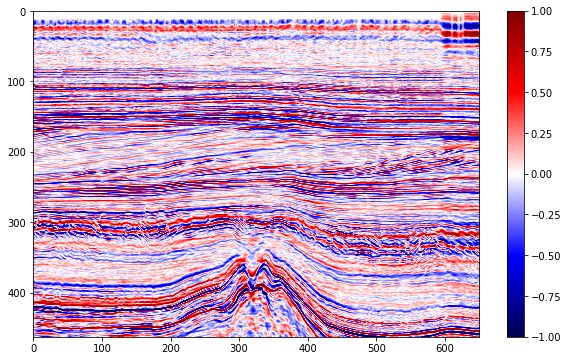

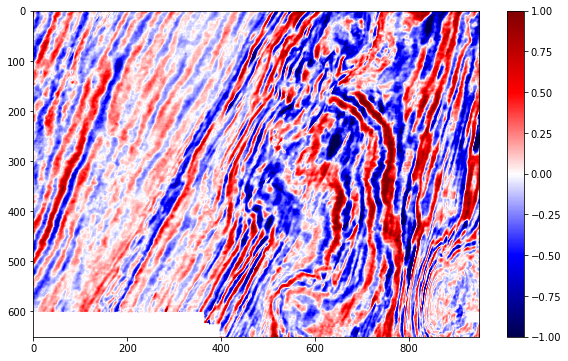

In [21]:
show_img( volp[ inline, :, :].T, 'seismic', clim=(-1, 1) )
show_img( volp[ :, crossline, :].T, 'seismic', clim=(-1, 1) )
show_img( volp[ :, :, timeline], 'seismic', clim=(-1, 1) )

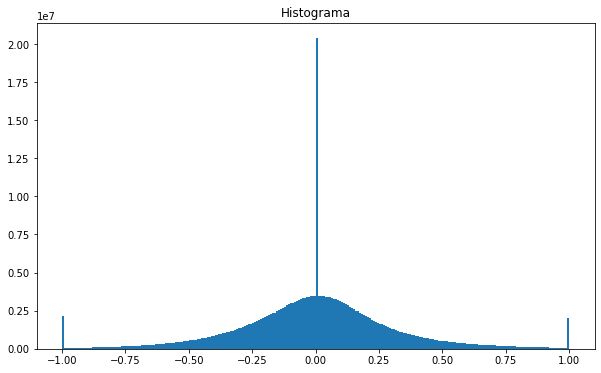

CPU times: user 7 s, sys: 103 ms, total: 7.11 s
Wall time: 7.11 s


In [30]:
%%time

s3 = 3 * np.std( vol )
vols = vol/s3
vols[vols > 1] = 1
vols[vols < -1] = -1
show_hist( vols )

**Observação:** calculando usando o desvio padrão, o processamento ficou mais rápido.

- Usando percentil: 13.5 s
- Usando o desvio padrão: 7.37 s

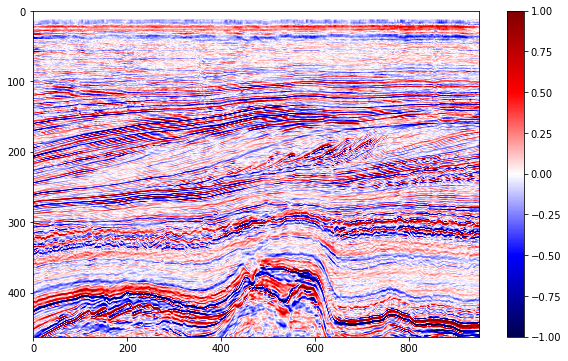

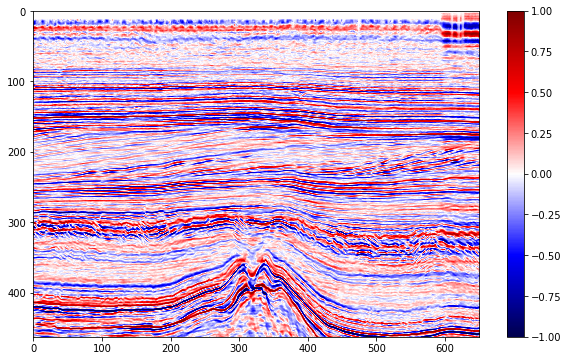

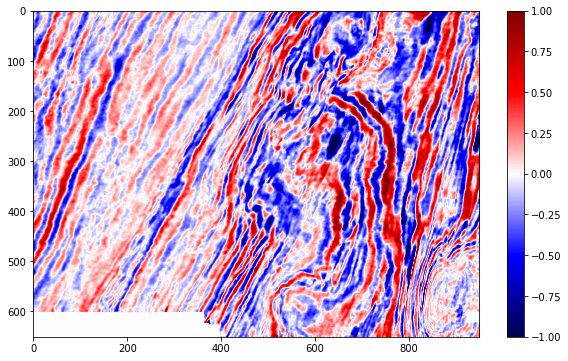

In [31]:
show_img( vols[ inline, :, :].T, 'seismic', clim=(-1, 1) )
show_img( vols[ :, crossline, :].T, 'seismic', clim=(-1, 1) )
show_img( vols[ :, :, timeline], 'seismic', clim=(-1, 1) )

### Usando outro colormap.

Colormap reference do Matplotlib:

https://matplotlib.org/stable/gallery/color/colormap_reference.html

Diverging colormaps

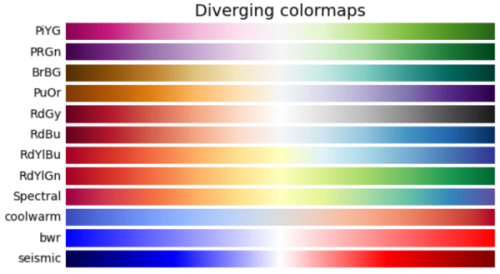

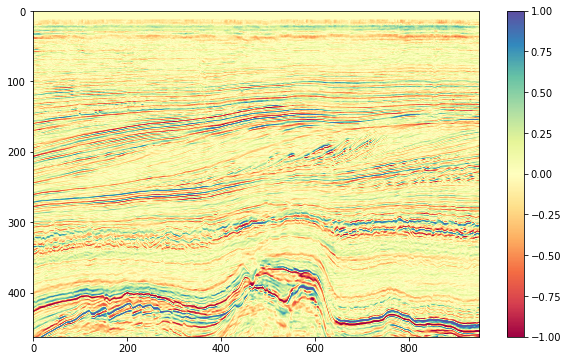

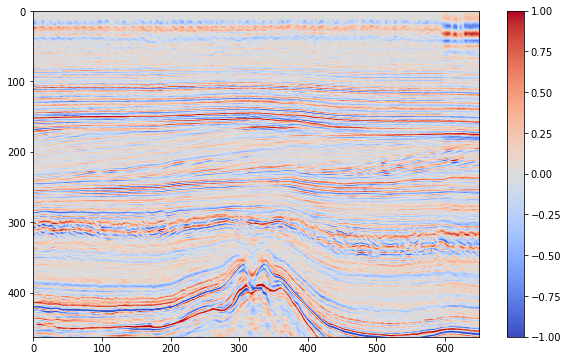

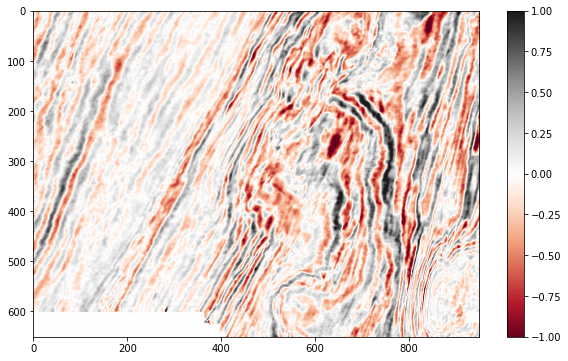

In [32]:
show_img( vols[ inline, :, :].T, 'Spectral', clim=(-1, 1) )
show_img( vols[ :, crossline, :].T, 'coolwarm', clim=(-1, 1) )
show_img( vols[ :, :, timeline], 'RdGy', clim=(-1, 1) )

### Para exportar para PDF.

In [33]:
%%time

!jupyter nbconvert --to html ./T1_DanielCosta_SISMICA.ipynb

[NbConvertApp] Converting notebook ./T1_DanielCosta_SISMICA.ipynb to html
[NbConvertApp] Writing 4050250 bytes to ./T1_DanielCosta_SISMICA.html
CPU times: user 25.3 ms, sys: 23.2 ms, total: 48.5 ms
Wall time: 1.65 s
